In [4]:
import pandas as pd
import numpy as np

In [5]:
df2 = pd.read_excel("diabetes_null.xlsx")
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [6]:
df2.shape

(768, 9)

In [7]:
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
df1 = df2.copy()

In [10]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,11.0,76.0,48.0,18.0,32.9,0.171,63,0
764,2,122.0,7.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,3,0
766,1,126.0,6.0,NaN,NaN,3.1,0.349,47,1


### deleting rows which have missing values

In [11]:
df1_no_missing = df1.dropna(axis = 0)

In [12]:
df1_no_missing.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,5.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,7.0,45.0,543.0,3.5,0.158,53,1
13,1,189.0,6.0,23.0,846.0,3.1,0.398,59,1


In [13]:
df1_no_missing.shape

(392, 9)

In [14]:
df2.shape

(768, 9)

### Imputing with mean

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
df3 = pd.read_excel("diabetes_null.xlsx",na_values=["#NAME?"])
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [17]:
imp = SimpleImputer(missing_values=np.nan,strategy = "mean")
imp.fit(df3)

SimpleImputer()

In [18]:
df3_fill_missing = pd.DataFrame(data = imp.transform(df3),columns=df3.columns)
df3_fill_missing.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,105.659898,33.6,0.627,5.0,1.0
1,1.0,85.0,66.0,29.000000,105.659898,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.876155,105.659898,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,4.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [19]:
df3_fill_missing.shape

(768, 9)

### Imputing with median

In [20]:
df4 = pd.read_excel("diabetes_null.xlsx",na_values=["#NAME?"])
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [21]:
imp2 = SimpleImputer(missing_values=np.nan,strategy = "median")
imp2.fit(df4)

SimpleImputer(strategy='median')

In [22]:
df4_fill_missing = pd.DataFrame(data = imp2.transform(df4),columns=df4.columns)
df4_fill_missing.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,71.0,33.6,0.627,5.0,1.0
1,1.0,85.0,66.0,29.0,71.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,27.0,71.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,4.0,35.0,168.0,43.1,2.288,33.0,1.0


### Treating Outliers

In [26]:
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    outlier_indices = list(x.index[(x>ub) | (x<lb)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices , outlier_values

### Pregnancies

In [27]:
find_outliers(df1["Pregnancies"])

([88, 159, 298, 455], [15, 17, 14, 14])

In [24]:
df1.shape

(768, 9)

In [30]:
df1.iloc[88,0]

15

In [31]:
df1.iloc[88]

Pregnancies                  15.000
Glucose                     136.000
BloodPressure                 7.000
SkinThickness                32.000
Insulin                      11.000
BMI                          37.100
DiabetesPedigreeFunction      0.153
Age                          43.000
Outcome                       1.000
Name: 88, dtype: float64

### Glucose

In [38]:
find_outliers(df1["Glucose"])

([], [])

### BloodPressure

In [45]:
find_outliers(df1["BloodPressure"])

([], [])

### SkinThickness

In [40]:
find_outliers(df1["SkinThickness"])

([445, 579], [63.0, 99.0])

### Insulin

In [41]:
find_outliers(df1["Insulin"])

([8, 13, 111, 153, 186, 220, 228, 258, 286, 370, 392, 409, 415, 710, 715],
 [543.0,
  846.0,
  495.0,
  485.0,
  495.0,
  478.0,
  744.0,
  375.0,
  545.0,
  465.0,
  415.0,
  579.0,
  474.0,
  387.0,
  392.0])

### BMI

In [42]:
find_outliers(df1["BMI"])

([8,
  13,
  15,
  41,
  58,
  97,
  114,
  120,
  125,
  136,
  147,
  153,
  155,
  159,
  170,
  177,
  186,
  192,
  193,
  199,
  201,
  203,
  217,
  238,
  245,
  247,
  249,
  256,
  260,
  261,
  267,
  275,
  283,
  288,
  293,
  297,
  303,
  308,
  317,
  329,
  355,
  380,
  381,
  422,
  423,
  428,
  431,
  432,
  443,
  445,
  449,
  457,
  460,
  468,
  486,
  497,
  508,
  516,
  528,
  559,
  574,
  606,
  610,
  617,
  622,
  624,
  638,
  669,
  673,
  675,
  695,
  729,
  741,
  744,
  745,
  766,
  767],
 [3.5,
  3.1,
  3.0,
  4.2,
  4.5,
  2.4,
  3.5,
  53.2,
  55.0,
  3.8,
  3.5,
  4.6,
  5.0,
  4.9,
  3.8,
  67.1,
  3.1,
  3.4,
  52.3,
  3.9,
  4.1,
  2.4,
  3.0,
  3.8,
  3.0,
  52.3,
  3.1,
  3.1,
  3.9,
  3.0,
  4.0,
  4.5,
  3.4,
  2.8,
  4.5,
  3.7,
  52.9,
  3.5,
  3.5,
  3.8,
  3.4,
  3.8,
  2.0,
  4.6,
  3.8,
  4.6,
  3.4,
  3.0,
  3.5,
  59.4,
  3.5,
  3.2,
  2.8,
  3.0,
  4.7,
  3.1,
  3.4,
  3.3,
  3.8,
  3.1,
  3.1,
  4.0,
  3.9,
  2.1,
  4.8,
  3.8

### DiabetesPedigreeFunction

In [43]:
find_outliers(df1["DiabetesPedigreeFunction"])

([4,
  12,
  39,
  45,
  58,
  147,
  187,
  220,
  228,
  243,
  259,
  308,
  330,
  370,
  371,
  383,
  395,
  412,
  416,
  445,
  534,
  546,
  593,
  606,
  618,
  621,
  622,
  659,
  661,
  747,
  755],
 [2.288,
  1.441,
  1.39,
  1.893,
  1.781,
  1.4,
  1.321,
  1.72,
  2.329,
  1.318,
  1.353,
  1.391,
  1.476,
  2.137,
  1.731,
  1.268,
  1.6,
  1.76,
  1.95,
  2.42,
  1.251,
  1.34,
  1.699,
  1.258,
  1.282,
  1.698,
  1.461,
  1.292,
  1.394,
  1.96,
  1.57])

### Age

In [44]:
find_outliers(df1["Age"])

([123,
  129,
  148,
  221,
  263,
  294,
  361,
  362,
  363,
  453,
  456,
  459,
  479,
  489,
  495,
  509,
  537,
  552,
  579,
  582,
  674,
  684,
  759,
  763],
 [69,
  62,
  65,
  66,
  63,
  65,
  63,
  65,
  67,
  72,
  62,
  81,
  63,
  67,
  66,
  64,
  67,
  66,
  62,
  62,
  68,
  69,
  66,
  63])

### Visualization

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from matplotlib.pyplot import figure
figure(figsize = (10,5),dpi = 80)

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

### Histogram

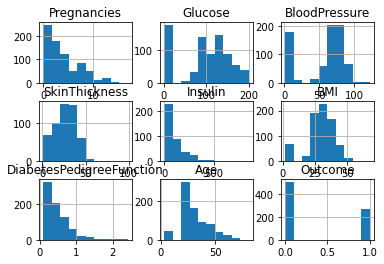

In [53]:
df1.hist()
plt.show()

### Density plot

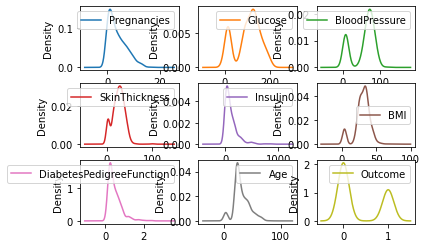

In [54]:
df1.plot(kind = "density",subplots = True, layout=(3,3),sharex = False)
plt.show()

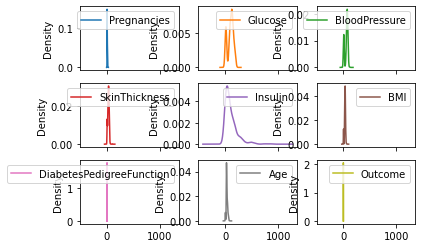

In [55]:
df1.plot(kind = "density",subplots = True, layout=(3,3))
plt.show()

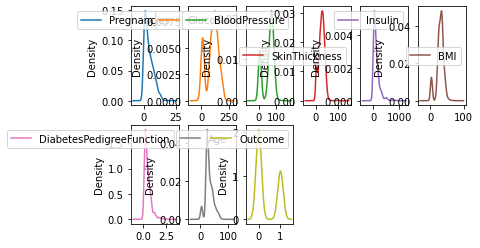

In [57]:
df1.plot(kind = "density",subplots = True, layout=(2,6),sharex = False)
plt.show()

### box plot

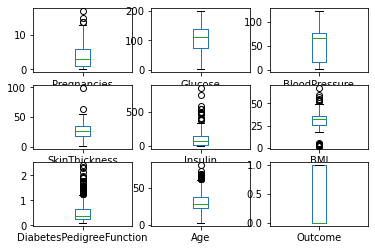

In [62]:
df1.plot(kind = "box",subplots = True, layout=(3,3),sharey = False)
plt.show()

### Scatter plot

In [63]:
from pandas.plotting import scatter_matrix

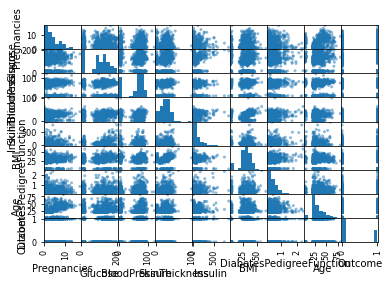

In [65]:
scatter_matrix(df1)
plt.show()

### Correlation Matrix

<AxesSubplot:>

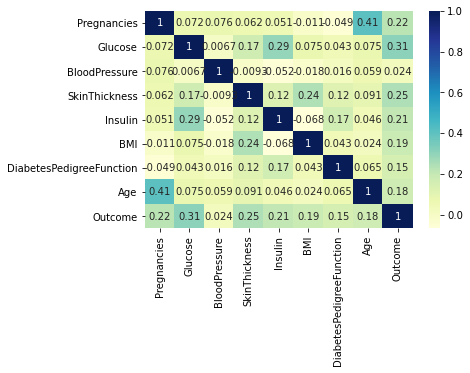

In [66]:
cor = df1.corr()
sns.heatmap(data = cor , cmap = "YlGnBu",annot = True)